In [448]:
# 고객 이탈에 여부 분류 모델
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
# 데이터 읽기
import pandas as pd
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1. 데이터 기본 정보 확인

In [449]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [450]:
df.select_dtypes(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [451]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [453]:
# Churn Yes No --> 1 0 으로 변경
df['Churn'] =  df.Churn.map({'Yes':1,'No':0})
# df.Churn.apply(lambda x : 1 if x=='Yes' else 0)

In [454]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### baseline 데이터 및 모델 생성

In [455]:
# 피처선택 
base_df =  df.select_dtypes(include=['int','float']).copy()
# 결측치 처리
base_df = base_df.dropna()
X = base_df.drop(columns=['Churn']).to_numpy()
y = base_df.Churn
# 클래스 불균형
print( y.value_counts() )
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# rus = RandomUnderSampler(random_state=42)
# X,y = rus.fit_resample(X,y)

smote = SMOTE()
X,y = smote.fit_resample(X,y)

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled =  scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# 모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# 학습
knn.fit(x_train_scaled, y_train)
# 평가
from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test, predict))

Churn
0    5163
1    1869
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1033
           1       0.77      0.81      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



#### 2. 주요 특성 시각화

In [456]:
# 고객 이탈에 여부 분류 모델
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
# 데이터 읽기
import pandas as pd
df = pd.read_csv(url)
df = df.drop(columns=['customerID'])
df.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


#### 데이터 누수 Data Leakage

학습데이터에 정답데이터(컬럼) 포함

In [457]:
import seaborn as sns
# 성별에 따른 이탈률
# sns.countplot(data=df,x='PhoneService',hue='Churn')
# 차이를 보이는 Partner	Dependents	PhoneService 컬럼을 onehot으로 변경해서 학습에 적용
new_df =  df.copy()
new_df = new_df.dropna()

X = new_df.drop(columns=['Churn'])
new_df['Churn'] = new_df.Churn.map({'Yes':1,'No':0})
y = new_df.Churn.to_numpy()

new_df['Partner']=new_df.Partner.map({'Yes':1, 'No':0})
new_df['Dependents']=new_df.Dependents.map({'Yes':1, 'No':0})
new_df['PhoneService']=new_df.PhoneService.map({'Yes':1, 'No':0})

new_df = pd.concat([new_df,pd.get_dummies(new_df.Partner).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.Dependents).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.PhoneService).astype(int)],axis=1)

new_df = new_df.drop(columns=['Partner','Dependents','PhoneService'])
new_df.head()

# 학습가능한 수치데이터
train_df = new_df.select_dtypes(include=['int','float'])
X = train_df.to_numpy()
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
# 정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train);  x_test_scaled = s.fit_transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [458]:
import seaborn as sns
# 성별에 따른 이탈률
# sns.countplot(data=df,x='PhoneService',hue='Churn')
# 차이를 보이는 Partner	Dependents	PhoneService 컬럼을 onehot으로 변경해서 학습에 적용
new_df =  df.copy()
new_df['TotalCharges'] =  pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df = new_df.dropna()
new_df['Churn'] = new_df.Churn.map({'Yes':1,'No':0})
new_df['Partner']=new_df.Partner.map({'Yes':1, 'No':0})
new_df['Dependents']=new_df.Dependents.map({'Yes':1, 'No':0})
new_df['PhoneService']=new_df.PhoneService.map({'Yes':1, 'No':0})

new_df = pd.concat([new_df,pd.get_dummies(new_df.Partner).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.Dependents).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.PhoneService).astype(int)],axis=1)

new_df = new_df.drop(columns=['Partner','Dependents','PhoneService'])

# 학습가능한 수치데이터
train_df = new_df.select_dtypes(include=['int','float'])
X = train_df.drop(columns=['Churn']).to_numpy()
y = train_df.Churn.to_numpy()

# 클래스 불균형 해결
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
# 정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train);  x_test_scaled = s.fit_transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1033
           1       0.80      0.79      0.79      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



#### 새로운 피처 탐색

In [459]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df = df.dropna()

In [460]:
df.select_dtypes(exclude=['object']).corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [461]:
import seaborn as sns
# 성별에 따른 이탈률
# sns.countplot(data=df,x='PhoneService',hue='Churn')
# 차이를 보이는 Partner	Dependents	PhoneService 컬럼을 onehot으로 변경해서 학습에 적용
new_df =  df.copy()
new_df['TotalCharges'] =  pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df = new_df.dropna()
new_df['Churn'] = new_df.Churn.map({'Yes':1,'No':0})

new_df = new_df.drop(columns=['Partner','Dependents','PhoneService','TotalCharges'])

# 학습가능한 수치데이터
train_df = new_df.select_dtypes(include=['int','float'])
X = train_df.drop(columns=['Churn']).to_numpy()
y = train_df.Churn.to_numpy()

# 클래스 불균형 해결
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
# 정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train);  x_test_scaled = s.fit_transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1033
           1       0.75      0.73      0.74      1033

    accuracy                           0.74      2066
   macro avg       0.74      0.74      0.74      2066
weighted avg       0.74      0.74      0.74      2066



In [462]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='tenure', ylabel='Count'>

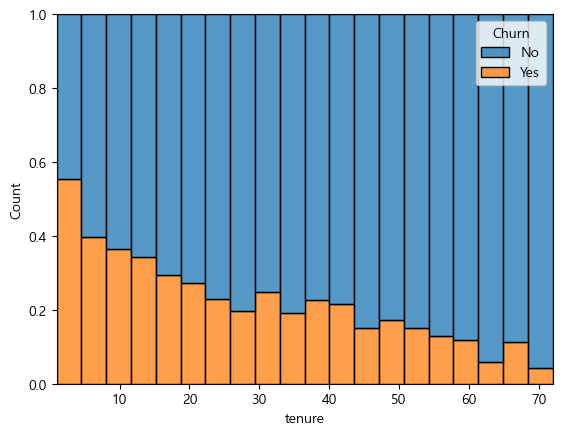

In [463]:
# tenure 에 따른 이탈률
sns.histplot(data=df, x='tenure', hue='Churn',multiple='fill',bins=20)

<Axes: xlabel='Contract', ylabel='Count'>

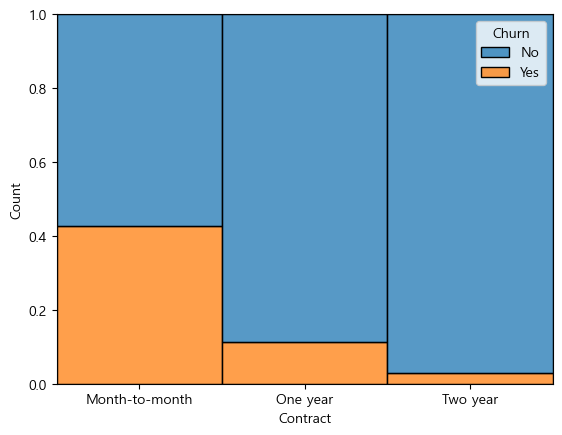

In [464]:
# Contract 에 따른 이탈률
sns.histplot(data=df, x='Contract', hue='Churn',multiple='fill',bins=20)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


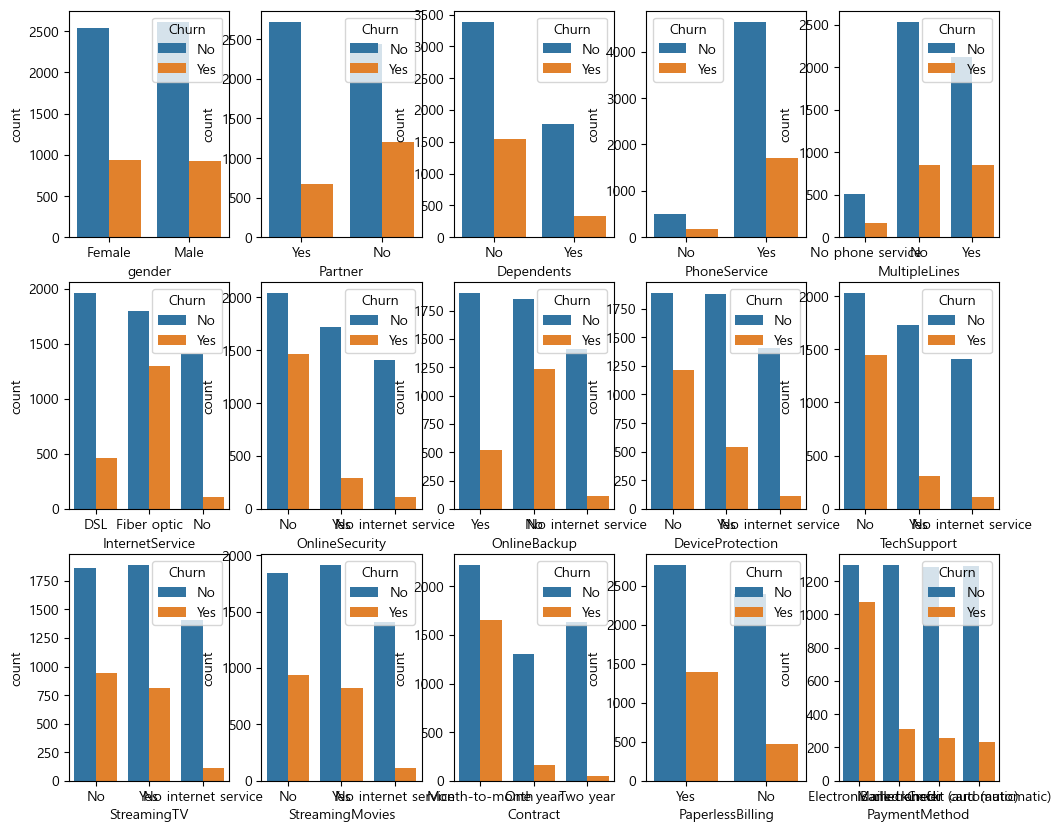

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
# 데이터 읽기
import pandas as pd
df = pd.read_csv(url)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df = df.dropna()
df = df.drop(columns=['customerID'])
non_numeric_cols = df.describe(include=['object']).columns
print(non_numeric_cols)
fig,ax = plt.subplots(3,5,figsize=(12,10))
for idx,colname in enumerate(non_numeric_cols[:-1]):
    sns.countplot(data=df, x=colname, hue='Churn',ax=ax[idx//5, idx%5])


    
    

In [466]:
import pandas as pd
import numpy as np

# 데이터셋 로드 (예시)
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# --- 1. 원-핫 인코딩을 적용할 범주형 컬럼 목록 정의 ---
# 먼저, 데이터 타입이 'object'인 모든 컬럼을 찾습니다.
categorical_cols = df.select_dtypes(include=['object']).columns

# 타겟 변수인 'Churn'과 불필요한 'customerID'를 목록에서 제외합니다.
cols_to_encode = [col for col in categorical_cols if col not in ['Churn', 'customerID']]

print("--- 원-핫 인코딩 대상 컬럼 ---")
print(cols_to_encode)


# --- 2. pd.get_dummies()를 사용하여 원-핫 인코딩 적용 ---
# drop_first=True : 다중공선성(multicollinearity) 문제를 방지하기 위해 
#                   각 특성의 첫 번째 카테고리 컬럼을 제거합니다. (예: gender_Female만 생성)
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True, dtype=int)


# --- 3. 결과 확인 ---
print("\n\n--- 변환 전 컬럼 목록 ---")
print(df.columns)

print("\n--- 변환 후 컬럼 목록 ---")
print(df_encoded.columns)

print("\n\n--- 변환 후 데이터 샘플 (일부) ---")
# gender_Male, Partner_Yes 등 새로운 컬럼들이 생성된 것을 확인할 수 있습니다.
print(df_encoded.head())

--- 원-핫 인코딩 대상 컬럼 ---
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


--- 변환 전 컬럼 목록 ---
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

--- 변환 후 컬럼 목록 ---
Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_9

In [467]:
df['Contract'] = df.Contract.map({
    'Month-to-month':0,
    'Two year':2,
    'One year':1,
})

In [468]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Windows 기본 한글 폰트: 'Malgun Gothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

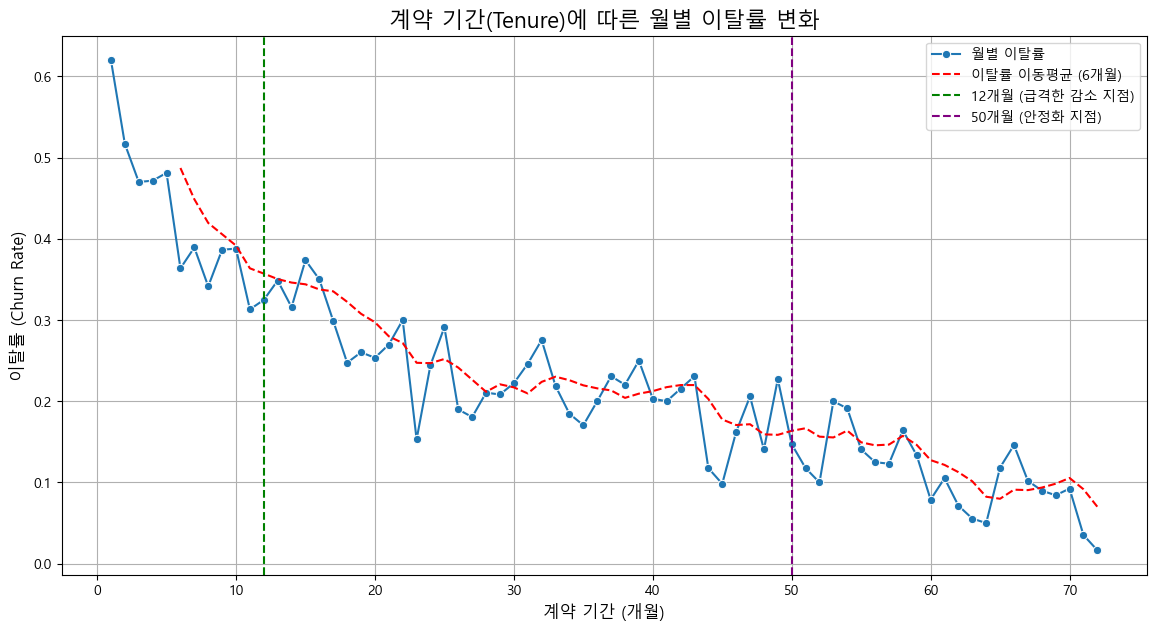

In [469]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드 및 기본 전처리
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 1. Tenure 월별 이탈률 계산
# groupby를 이용해 각 tenure 월별 평균 이탈률을 계산합니다.
churn_rate_by_tenure = df.groupby('tenure')['Churn'].mean().reset_index()

# 2. 시각화를 통해 이탈률 변화 추이 확인
plt.figure(figsize=(14, 7))
sns.lineplot(data=churn_rate_by_tenure, x='tenure', y='Churn', marker='o', label='월별 이탈률')

# 추세를 더 명확하게 보기 위해 이동 평균(rolling average)을 함께 그립니다.
plt.plot(churn_rate_by_tenure['tenure'], churn_rate_by_tenure['Churn'].rolling(window=6).mean(), 
         color='red', linestyle='--', label='이탈률 이동평균 (6개월)')

# 주요 경계선 표시
plt.axvline(x=12, color='green', linestyle='--', label='12개월 (급격한 감소 지점)')
plt.axvline(x=50, color='purple', linestyle='--', label='50개월 (안정화 지점)')

plt.title('계약 기간(Tenure)에 따른 월별 이탈률 변화', fontsize=16)
plt.xlabel('계약 기간 (개월)', fontsize=12)
plt.ylabel('이탈률 (Churn Rate)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [470]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# --- 1. 데이터 로드 및 기본 전처리 ---
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# TotalCharges 숫자 변환 및 결측치 처리 (중앙값으로 대체)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# 타겟 변수 Churn을 0과 1로 변환
df['Churn'] = df.Churn.map({'Yes': 1, 'No': 0})

# 불필요한 customerID 컬럼 제거
df = df.drop(columns=['customerID'])


# --- 2. 피처 엔지니어링 ---

# 'Contract' 컬럼: 요청하신 대로 순서형 인코딩
df['Contract'] = df.Contract.map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# 'tenure' 컬럼: 히스토그램 기반으로 3개 구간으로 나눈 후 원-핫 인코딩
# (기존 코드를 그대로 활용)
count, bin_edges = np.histogram(df.tenure, bins=3)
df['tenure'] = pd.cut(df.tenure, bins=bin_edges, labels=['tenure_group_1', 'tenure_group_2', 'tenure_group_3'], include_lowest=True)
df = pd.get_dummies(df, columns=['tenure'], dtype=int)

# 나머지 모든 범주형(object) 컬럼에 대해 원-핫 인코딩 적용
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)


# --- 3. 피처(X)와 타겟(y) 분리 ---
X = df.drop(columns=['Churn'])
y = df['Churn']


# --- 4. 클래스 불균형 처리 (SMOTE) ---
print("--- SMOTE 적용 전 클래스 분포 ---")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n--- SMOTE 적용 후 클래스 분포 ---")
print(y_resampled.value_counts())


# --- 5. 데이터 분할 ---
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)


# --- 6. 스케일링 ---
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# --- 7. 모델 학습 및 평가 ---
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

predict = knn.predict(x_test_scaled)
print("\n--- 최종 분류 리포트 ---")
print(classification_report(y_test, predict))

--- SMOTE 적용 전 클래스 분포 ---
Churn
0    5174
1    1869
Name: count, dtype: int64

--- SMOTE 적용 후 클래스 분포 ---
Churn
0    5174
1    5174
Name: count, dtype: int64

--- 최종 분류 리포트 ---
              precision    recall  f1-score   support

           0       0.84      0.76      0.79      1035
           1       0.78      0.85      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



C:\Users\playdata2\AppData\Local\Temp\ipykernel_16452\3353260789.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [471]:
'''
SMOTE는 소수 클래스를 늘려주지만, 때로는 클래스 경계에 노이즈 데이터를 생성할 수 있습니다. 
SMOTE-ENN은 SMOTE로 오버샘플링을 한 후, ENN(Edited Nearest Neighbours)이라는 언더샘플링 기법으로 
경계선 주변의 노이즈 데이터(오분류하기 쉬운 데이터)를 제거합니다. 이를 통해 모델이 더 명확한 결정 경계를 학습하도록 도와 성능, 
특히 정밀도(precision) 향상에 도움이 될 수 있습니다.
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# imblearn.combine에서 SMOTEENN을 불러옵니다.
from imblearn.combine import SMOTEENN

# --- 1. 데이터 로드 및 기본 전처리 ---
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# TotalCharges 숫자 변환 및 결측치 처리 (중앙값으로 대체)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# 타겟 변수 Churn을 0과 1로 변환
df['Churn'] = df.Churn.map({'Yes': 1, 'No': 0})

# 불필요한 customerID 컬럼 제거
df = df.drop(columns=['customerID'])


# --- 2. 피처 엔지니어링 ---

# 'Contract' 컬럼: 순서형 인코딩
df['Contract'] = df.Contract.map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# 'tenure' 컬럼: 히스토그램 기반으로 3개 구간으로 나눈 후 원-핫 인코딩
count, bin_edges = np.histogram(df.tenure, bins=3)
df['tenure'] = pd.cut(df.tenure, bins=bin_edges, labels=['tenure_group_1', 'tenure_group_2', 'tenure_group_3'], include_lowest=True)
df = pd.get_dummies(df, columns=['tenure'], dtype=int)

# 나머지 모든 범주형(object) 컬럼에 대해 원-핫 인코딩 적용
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)


# --- 3. 피처(X)와 타겟(y) 분리 ---
X = df.drop(columns=['Churn'])
y = df['Churn']


# --- 4. 클래스 불균형 처리 (SMOTE-ENN) ---
print("--- SMOTE-ENN 적용 전 클래스 분포 ---")
print(y.value_counts())

# SMOTEENN 객체 생성
# SMOTE로 오버샘플링 후 ENN으로 노이즈를 제거합니다.
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("\n--- SMOTE-ENN 적용 후 클래스 분포 ---")
# SMOTE와 달리 두 클래스의 샘플 수가 완전히 동일하지 않을 수 있습니다.
# ENN이 일부 다수 클래스 샘플도 제거하기 때문입니다.
print(y_resampled.value_counts())


# --- 5. 데이터 분할 ---
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)


# --- 6. 스케일링 ---
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# --- 7. 모델 학습 및 평가 ---
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

predict = knn.predict(x_test_scaled)
print("\n--- SMOTE-ENN 적용 후 최종 분류 리포트 ---")
print(classification_report(y_test, predict))

C:\Users\playdata2\AppData\Local\Temp\ipykernel_16452\133004706.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


--- SMOTE-ENN 적용 전 클래스 분포 ---
Churn
0    5174
1    1869
Name: count, dtype: int64

--- SMOTE-ENN 적용 후 클래스 분포 ---
Churn
1    3161
0    2672
Name: count, dtype: int64

--- SMOTE-ENN 적용 후 최종 분류 리포트 ---
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       535
           1       0.90      0.96      0.93       632

    accuracy                           0.92      1167
   macro avg       0.92      0.92      0.92      1167
weighted avg       0.92      0.92      0.92      1167



In [472]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# imblearn.combine에서 SMOTEENN을 불러옵니다.
from imblearn.combine import SMOTEENN
# 파이프라인을 사용하면 여러 단계를 하나로 묶어 편리하게 관리할 수 있습니다.
from sklearn.pipeline import Pipeline

# --- 1. 데이터 로드 및 기본 전처리 (이전과 동일) ---
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# TotalCharges 숫자 변환 및 결측치 처리 (중앙값으로 대체)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# 타겟 변수 Churn을 0과 1로 변환
df['Churn'] = df.Churn.map({'Yes': 1, 'No': 0})

# 불필요한 customerID 컬럼 제거
df = df.drop(columns=['customerID'])


# --- 2. 피처 엔지니어링 (이전과 동일) ---

# 'Contract' 컬럼: 순서형 인코딩
df['Contract'] = df.Contract.map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# 'tenure' 컬럼: 히스토그램 기반으로 3개 구간으로 나눈 후 원-핫 인코딩
count, bin_edges = np.histogram(df.tenure, bins=3)
df['tenure'] = pd.cut(df.tenure, bins=bin_edges, labels=['tenure_group_1', 'tenure_group_2', 'tenure_group_3'], include_lowest=True)
df = pd.get_dummies(df, columns=['tenure'], dtype=int)

# 나머지 모든 범주형(object) 컬럼에 대해 원-핫 인코딩 적용
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)


# --- 3. 피처(X)와 타겟(y) 분리 ---
X = df.drop(columns=['Churn'])
y = df['Churn']


# --- 4. 클래스 불균형 처리 (SMOTE-ENN) ---
print("--- SMOTE-ENN 적용 전 클래스 분포 ---")
print(y.value_counts())

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("\n--- SMOTE-ENN 적용 후 클래스 분포 ---")
print(y_resampled.value_counts())


# --- 5. 데이터 분할 ---
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)


# --- 6. 파이프라인 구성 및 하이퍼파라미터 튜닝 ---
# 스케일링 -> 다항 특성 생성 -> k-NN 모델 학습 순서의 파이프라인
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('knn', KNeighborsClassifier())
])

# GridSearchCV를 위한 파라미터 그리드
param_grid = {
    'knn__n_neighbors': [7, 9, 11, 13],
    'knn__weights': ['distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

print("\nGridSearchCV를 시작합니다. SMOTE-ENN과 다항 특성 생성으로 인해 시간이 상당히 걸릴 수 있습니다...")
grid_search.fit(x_train, y_train)


# --- 7. 최종 모델 평가 ---
print(f"\n최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최고 교차 검증 F1-Score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
predict = best_model.predict(x_test)

print("\n--- SMOTE-ENN + 다항 특성 적용 후 최종 분류 리포트 ---")
print(classification_report(y_test, predict))

--- SMOTE-ENN 적용 전 클래스 분포 ---
Churn
0    5174
1    1869
Name: count, dtype: int64


C:\Users\playdata2\AppData\Local\Temp\ipykernel_16452\1181071186.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)



--- SMOTE-ENN 적용 후 클래스 분포 ---
Churn
1    3161
0    2672
Name: count, dtype: int64

GridSearchCV를 시작합니다. SMOTE-ENN과 다항 특성 생성으로 인해 시간이 상당히 걸릴 수 있습니다...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

최적의 하이퍼파라미터: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
최고 교차 검증 F1-Score: 0.9216

--- SMOTE-ENN + 다항 특성 적용 후 최종 분류 리포트 ---
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       535
           1       0.89      0.98      0.93       632

    accuracy                           0.92      1167
   macro avg       0.93      0.92      0.92      1167
weighted avg       0.93      0.92      0.92      1167

